# Biological question: Do top50 of each way of binding of the orientation analysis have a peferred binding distance?
#### Data: WP2 - body of pancreas- cluster 2

### Outline of this notebook:
    1. Implementation of orientation analysis for cluster 
    2. Implementation of distance analysis for cluster
    3. Combination of orientation analysis and distance analysis
    4. Answering biological questions and literature context  

## 1. Implementation of orientation analysis for cluster 
1. Read in the path of the regions of specific cluster, the generell motifs path and the genome path.
2. Peforming the market basket analysis with the count_within() with the stranded option and directional turned on, so the 4 different ways of binding are taken into account
3. Analyze preferential orientation of motifs and create a directionality analysis

In [1]:
import tfcomb
C = tfcomb.CombObj(verbosity=0)

C.TFBS_from_motifs(regions="/mnt/workspace_stud/stud3/WP2_OUTPUT/FINISHED/JF1O6_body_of_pancreas/WP6/JF1O6_body_of_pancreas.2_peaks.bed", 
                   motifs="/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/testdaten/JASPAR2020_CORE_vertebrates.meme",
                   genome="/mnt/workspace_stud/allstud/homo_sapiens.104.mainChr.fa", 
                   threads=8)

In [30]:
C.count_within(directional=True, stranded=True, threads=8)
C.market_basket()

In [31]:
df_orientation = C.analyze_orientation()

INFO: Rules are directional - scenarios counted are: ['TF1-TF2', 'TF2-TF1', 'convergent', 'divergent']


#### Select the significant pairs  on pvalue and number of sites and visualize the preferences for orientation

In [32]:
orientation_selected = df_orientation[(df_orientation["pvalue"] < 0.05)
              & (df_orientation["TF1_TF2_count"] > 50)]             

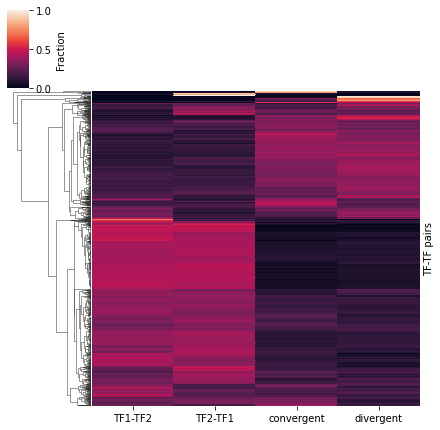

In [33]:
orientation_heatmap = orientation_selected.plot_heatmap()

#### Sorted  selected co-occurring TF pairs for each way of binding

In [20]:
#TFs specific in TF1-TF2 orientation
orientation_selected.sort_values("TF1-TF2", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
IRF1-ZNF135,IRF1,ZNF135,92,0.739130,0.163043,0.065217,0.032609,0.330764,5.234607e-26
IRF1-ZNF460,IRF1,ZNF460,179,0.720670,0.150838,0.072626,0.055866,0.316498,2.224758e-46
Foxd3-ZNF135,Foxd3,ZNF135,57,0.719298,0.210526,0.070175,0.000000,0.324877,1.447358e-15
Foxd3-ZNF460,Foxd3,ZNF460,86,0.674419,0.220930,0.058140,0.046512,0.293935,3.314128e-19
ZNF135-Zfx,ZNF135,Zfx,166,0.620482,0.114458,0.138554,0.126506,0.247184,3.303362e-26
ZNF135-ZNF460,ZNF135,ZNF460,524,0.576336,0.385496,0.019084,0.019084,0.277788,7.608862e-105
ZNF354C-ZNF460,ZNF354C,ZNF460,233,0.557940,0.158798,0.141631,0.141631,0.205453,2.058356e-25
Arnt-YY2,Arnt,YY2,70,0.528571,0.214286,0.057143,0.200000,0.198806,2.922512e-07
KLF13-Klf12,KLF13,Klf12,106,0.518868,0.396226,0.018868,0.066038,0.245585,1.552599e-16
ZKSCAN5-ZNF263,ZKSCAN5,ZNF263,66,0.515152,0.227273,0.151515,0.106061,0.183702,6.715617e-06


In [22]:
# TFs specific in TF2-TF1 orientation
orientation_selected.sort_values("TF2-TF1", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
MEF2D-Nr2f6var.2,MEF2D,Nr2f6var.2,65,0.000000,1.000000,0.000000,0.000000,0.500000,5.075229e-42
MEF2D-Rarg,MEF2D,Rarg,52,0.000000,0.980769,0.019231,0.000000,0.487264,6.591737e-32
MEF2A-Rarg,MEF2A,Rarg,59,0.033898,0.966102,0.000000,0.000000,0.477668,8.516607e-35
MEF2C-Nr2f6var.2,MEF2C,Nr2f6var.2,65,0.030769,0.923077,0.015385,0.030769,0.448777,7.773113e-34
MEF2A-Nr2f6var.2,MEF2A,Nr2f6var.2,76,0.039474,0.921053,0.000000,0.039474,0.447755,2.146226e-39
TBX1-ZNF135,TBX1,ZNF135,69,0.028986,0.898551,0.072464,0.000000,0.433391,1.696231e-33
TBX15-ZNF135,TBX15,ZNF135,69,0.028986,0.898551,0.072464,0.000000,0.433391,1.696231e-33
TBX4-ZNF135,TBX4,ZNF135,69,0.028986,0.898551,0.072464,0.000000,0.433391,1.696231e-33
TBX5-ZNF135,TBX5,ZNF135,69,0.028986,0.898551,0.072464,0.000000,0.433391,1.696231e-33
MGA-ZNF135,MGA,ZNF135,69,0.028986,0.898551,0.072464,0.000000,0.433391,1.696231e-33


In [23]:
#TFs specific in convergent orientation¶
orientation_selected.sort_values("convergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
RHOXF1-ZNF135,RHOXF1,ZNF135,58,0.000000,0.017241,0.931034,0.051724,0.454532,5.748080e-31
PITX2-ZNF135,PITX2,ZNF135,58,0.000000,0.017241,0.931034,0.051724,0.454532,5.748080e-31
RHOXF1-ZNF460,RHOXF1,ZNF460,55,0.018182,0.018182,0.927273,0.036364,0.451596,5.516140e-29
PITX2-ZNF460,PITX2,ZNF460,55,0.018182,0.018182,0.927273,0.036364,0.451596,5.516140e-29
Rbpjl-ZNF135,Rbpjl,ZNF135,66,0.030303,0.045455,0.848485,0.075758,0.399437,3.285739e-27
Rbpjl-ZNF460,Rbpjl,ZNF460,69,0.014493,0.101449,0.782609,0.101449,0.357431,8.867362e-23
SNAI2-ZNF460,SNAI2,ZNF460,97,0.020619,0.061856,0.701031,0.216495,0.312285,1.921650e-24
SNAI2-ZNF135,SNAI2,ZNF135,66,0.015152,0.015152,0.681818,0.287879,0.315283,5.754500e-17
MEF2A-ZNF460,MEF2A,ZNF460,315,0.006349,0.006349,0.552381,0.434921,0.285401,1.945108e-66
MEF2D-ZNF460,MEF2D,ZNF460,257,0.011673,0.000000,0.529183,0.459144,0.283422,2.025153e-53


In [24]:
# TFs specific in divergent orientation
orientation_selected.sort_values("divergent", ascending=False).head(10)

,TF1,TF2,TF1_TF2_count,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
SREBF1var.2-ZNF135,SREBF1var.2,ZNF135,77,0.000000,0.000000,0.025974,0.974026,0.482839,1.966441e-46
Nr2f6var.2-Zfx,Nr2f6var.2,Zfx,60,0.016667,0.016667,0.033333,0.933333,0.455623,3.434116e-32
Rarg-ZNF354C,Rarg,ZNF354C,59,0.000000,0.033898,0.033898,0.932203,0.455083,1.407036e-31
MEF2D-Zfx,MEF2D,Zfx,54,0.037037,0.000000,0.055556,0.907407,0.438880,7.084661e-27
Nr2f6var.2-ZNF354C,Nr2f6var.2,ZNF354C,63,0.000000,0.031746,0.063492,0.904762,0.437277,3.936327e-31
Rarg-Zfx,Rarg,Zfx,54,0.000000,0.018519,0.092593,0.888889,0.427800,1.550713e-25
MEF2A-Zfx,MEF2A,Zfx,63,0.031746,0.015873,0.079365,0.873016,0.416219,3.345083e-28
SREBF1var.2-ZNF460,SREBF1var.2,ZNF460,110,0.000000,0.027273,0.109091,0.863636,0.411709,3.111983e-48
SREBF1-ZNF460,SREBF1,ZNF460,57,0.052632,0.070175,0.017544,0.859649,0.407021,2.121570e-24
MEF2C-Zfx,MEF2C,Zfx,58,0.051724,0.051724,0.086207,0.810345,0.373917,5.884950e-21


#### Create list with all selected TF-pairs of orientation analysis for selecting the TF-pairs which are searched for in the distance alnaysis

In [36]:
TF_pairs =list(orientation_selected[["TF1","TF2"]].itertuples(index=False, name=None)) 
len(TF_pairs)

1425

## 2. Implementation of distance analysis for cluster
1. Read in path of the the pkl file from already performed market basket analysis (alternative: perform normal market basket analysis)
2. with list TF_pairs creating object with only the seleceted TF-pairs of the orientation analysis
3. performing distance analysis with considering the noisiness (lower noise, "clearer/better" analysis)


In [37]:
from tfcomb import CombObj
pancreas_cluster2_object = CombObj().from_pickle("/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/analyse/results/wp2/main/JF1O6_body_of_pancreas/JF1O6_body_of_pancreas.2_peaks.pkl")

In [39]:
TF_pairs_of_orientation_for_distance=pancreas_cluster2_object.select_custom_rules(TF_pairs)

In [50]:
TF_pairs_of_orientation_for_distance.analyze_distances(threads=6)

INFO: DistObject successfully created! It can be accessed via combobj.distObj
INFO: Calculating distances
INFO: Normalizing data.
INFO: Done finding distances! Results are found in .distances
INFO: Run .linregress_all() to fit linear regression
INFO: Fitting linear regression. With number of threads: 6
INFO: Linear regression finished! Results can be found in .linres
INFO: Correcting background with 6 threads.
INFO: Background correction finished! Results can be found in .corrected
INFO: Smoothing signals with window size 3
INFO: Shifting signals above zero
INFO: Analyzing Signal with threads 6
INFO: Done analyzing signal. Results are found in .peaks


In [51]:
TF_pairs_of_orientation_for_distance.distObj.evaluate_noise(threads=6)
TF_pairs_of_orientation_for_distance.distObj.rank_rules()

INFO: Evaluating noisiness of the signals with 6 threads


In [54]:
TF_pairs_of_orientation_for_distance.distObj.peaks

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
2101,MEF2D,Zfx,60,6.877380,7.147624,2,54,0.870370,0.014459,4.0,4.0,9.0,5.666667
2085,MEF2A,Zfx,59,6.893503,7.175617,2,63,0.825397,0.014983,7.0,2.0,11.0,6.666667
2093,MEF2C,Zfx,58,6.879755,7.168779,2,58,0.793103,0.011761,11.0,3.0,6.0,6.666667
2078,MEF2A,Rarg,35,5.825615,6.058777,2,59,0.949153,0.010986,2.0,22.0,4.0,9.333333
2095,MEF2D,Rarg,35,5.886553,6.120129,2,52,0.942308,0.011536,3.0,21.0,5.0,9.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,EGR2,KLF16,42,2.008430,3.166996,2,124,0.056452,0.331567,1038.0,2798.0,1273.0,1703.000000
717,ELK4,ELK4,79,2.006034,2.474998,2,71,0.056338,0.430764,1040.0,2802.0,1367.0,1736.333333
551,EGR2,SP9,88,2.004450,3.631702,2,113,0.044248,0.307015,1202.0,2809.0,1213.0,1741.333333
457,EGR1,KLF6,75,2.045349,2.962977,2,233,0.042918,0.463807,1216.0,2672.0,1376.0,1754.666667


 ## 3. Combination of orientation analysis and distance analysis
 1. merging the results from the orientation and the distance analysis in one dataframe df_orientation_distance
 2. selecting the TF pairs with a  peak hight of distance analysis above 2.8 and then progress the top50 of each orientation of binding further
 3. plotting the peak hights of the distnace analysis over the distance with the percentage of orientation in the color of the points


In [91]:
df_orientation_distance=TF_pairs_of_orientation_for_distance.distObj.peaks.merge(orientation_selected, left_on =["TF1","TF2"], right_on = ["TF1","TF2"])


In [70]:
df_top50_T1_TF2=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['TF1-TF2'], ascending=False).head(50)
df_top50_T2_TF1=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['TF2-TF1'], ascending=False).head(50)
df_top50_convergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['convergent'], ascending=False).head(50)
df_top50_divergent=df_orientation_distance[(df_orientation_distance["Peak Heights"]>2.8)].sort_values(by=['divergent'], ascending=False).head(50)


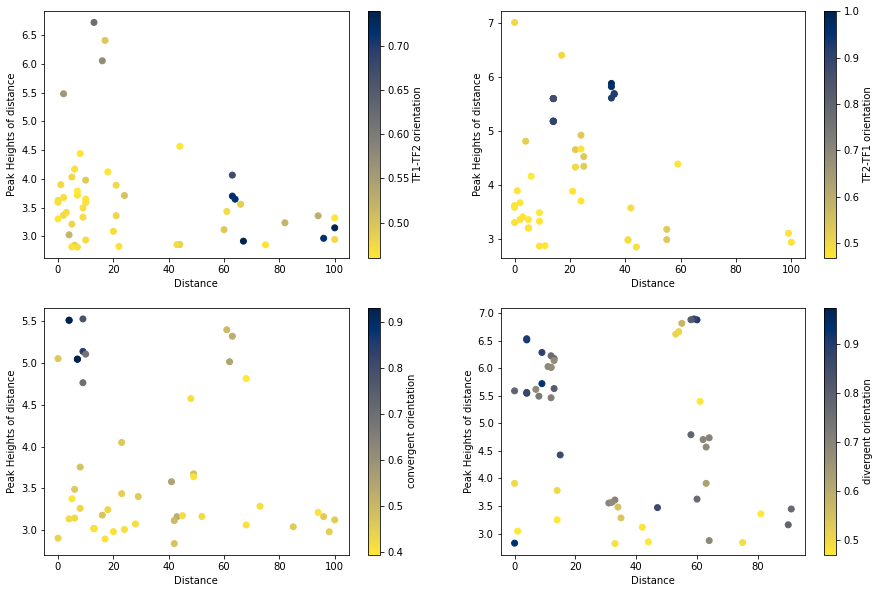

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10)) 

# subplot TF1-TF2
plt.subplot(221) 
plt.scatter(df_top50_T1_TF2['Distance'], df_top50_T1_TF2['Peak Heights'], c= df_top50_T1_TF2['TF1-TF2'], cmap = 'cividis_r')

cbar = plt.colorbar()
cbar.set_label("TF1-TF2 orientation")

plt.xlabel("Distance")
plt.ylabel("Peak Heights of distance")

# subplot TF2-TF1
plt.subplot(222) 
plt.scatter(df_top50_T2_TF1['Distance'], df_top50_T2_TF1['Peak Heights'], c= df_top50_T2_TF1['TF2-TF1'], cmap = 'cividis_r')

cbar = plt.colorbar()
cbar.set_label("TF2-TF1 orientation")

plt.xlabel("Distance")
plt.ylabel("Peak Heights of distance")

# subplot convergent
plt.subplot(223) 
plt.scatter(df_top50_convergent['Distance'], df_top50_convergent['Peak Heights'], c= df_top50_convergent['convergent'], cmap = 'cividis_r')

cbar = plt.colorbar()
cbar.set_label("convergent orientation")

plt.xlabel("Distance")
plt.ylabel("Peak Heights of distance")

# subplot divergent
plt.subplot(224) 
plt.scatter(df_top50_divergent['Distance'], df_top50_divergent['Peak Heights'], c= df_top50_divergent['divergent'], cmap = 'cividis_r')

cbar = plt.colorbar()
cbar.set_label("divergent orientation")

plt.xlabel("Distance")
plt.ylabel("Peak Heights of distance")


plt.show()

## 4. Answering biological questions and literature context  
 1. looking into specific TF-pairs and their distance for an orientation

In [93]:
df_top50_divergent.head()


,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count_x,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank,TF1_TF2_count_y,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
10,SREBF1var.2,ZNF135,4,5.546916,6.139307,2,77,0.961039,0.024284,1.0,33.0,21.0,18.333333,77,0.000000,0.000000,0.025974,0.974026,0.482839,1.966441e-46
37,Nr2f6var.2,Zfx,0,2.826585,2.826585,2,60,0.200000,0.04327,78.0,848.0,52.0,326.000000,60,0.016667,0.016667,0.033333,0.933333,0.455623,3.434116e-32
36,Nr2f6var.2,Zfx,9,5.720025,6.464811,2,60,0.700000,0.04327,19.0,23.0,52.0,31.333333,60,0.016667,0.016667,0.033333,0.933333,0.455623,3.434116e-32
18,Rarg,ZNF354C,4,6.513984,7.237228,2,59,0.813559,0.037275,9.0,10.0,46.0,21.666667,59,0.000000,0.033898,0.033898,0.932203,0.455083,1.407036e-31
0,MEF2D,Zfx,60,6.877380,7.147624,2,54,0.870370,0.014459,4.0,4.0,9.0,5.666667,54,0.037037,0.000000,0.055556,0.907407,0.438880,7.084661e-27


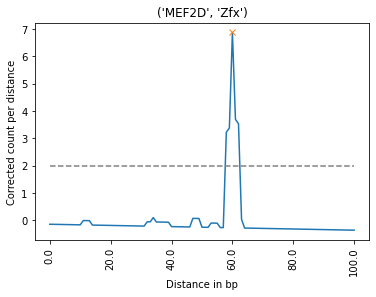

In [97]:
TF_pairs_of_orientation_for_distance.distObj.plot(("MEF2D", "Zfx"), method="signal")

In [98]:
df_top50_T2_TF1.head()

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count_x,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank,TF1_TF2_count_y,TF1-TF2,TF2-TF1,convergent,divergent,std,pvalue
7,MEF2D,Nr2f6var.2,36,5.687065,5.968324,2,65,0.738462,0.014216,15.0,26.0,8.0,16.333333,65,0.000000,1.000000,0.000000,0.000000,0.500000,5.075229e-42
4,MEF2D,Rarg,35,5.886553,6.120129,2,52,0.942308,0.011536,3.0,21.0,5.0,9.666667,52,0.000000,0.980769,0.019231,0.000000,0.487264,6.591737e-32
3,MEF2A,Rarg,35,5.825615,6.058777,2,59,0.949153,0.010986,2.0,22.0,4.0,9.333333,59,0.033898,0.966102,0.000000,0.000000,0.477668,8.516607e-35
12,MEF2C,Nr2f6var.2,35,5.615409,5.926861,2,65,0.676923,0.014802,21.0,29.0,10.0,20.000000,65,0.030769,0.923077,0.015385,0.030769,0.448777,7.773113e-34
6,MEF2A,Nr2f6var.2,36,5.698083,5.986344,2,76,0.723684,0.013239,17.0,24.0,7.0,16.000000,76,0.039474,0.921053,0.000000,0.039474,0.447755,2.146226e-39
